Открытый курс по машинному обучению.
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии Creative Commons CC BY-NC-SA 4.0. Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

Тема 1. Первичный анализ данных с Pandas
Практическое задание. Анализ данных пассажиров "Титаника"


In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re

Считаем данные из файла в память в виде объекта Pandas.DataFrame

In [3]:
data = pd.read_csv('/content/titanic_train.csv', index_col = 'PassengerId')

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Для примера отберем первые 10 пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).

In [ ]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C


Можно отсортировать этих людей по убыванию платы за билет.

In [ ]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)].sort_values(by ='Fare', ascending = False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**1. Сколько мужчин / женщин находилось на борту?**

In [ ]:
count_male = data[data['Sex']=='male'].shape[0]
count_female = data[data['Sex']=='female'].shape[0]
print(f"{count_male} мужчин, {count_female} женщин")


577 мужчин, 314 женщин


**2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**

In [ ]:
second_class_male = data[(data['Pclass'] == 2) & (data['Sex'] == 'male')].shape[0]
print(f"{second_class_male}")

108


**3. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.**

In [ ]:
med_fare = data['Fare'].median().round(2)
std_fare = data['Fare'].std().round(2)
print(f"Медиана - {med_fare}, стандартное отклонение - {std_fare}")

Медиана - 14.45, стандартное отклонение - 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**

In [ ]:
young_30 = data[data['Age']<30]
old_60 = data[data['Age']>60]
survived_young_30 = young_30['Survived'].mean()
survived_old_60 = old_60['Survived'].mean()
print(survived_young_30*100, survived_old_60*100)

40.625 22.727272727272727


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**

In [9]:
fem = data[data['Sex'] == 'female']
male = data[data['Sex'] == 'male']
fem_survived = fem['Survived'].mean()
male_survived = male['Survived'].mean()
print(f"{(male_survived*100).round(1)}% среди мужчин и {(fem_survived*100).round(1)}% среди женщин ")

18.9% среди мужчин и 74.2% среди женщин 


**Найдите самое популярное имя среди пассажиров Титаника мужского пола?**

In [12]:
male_names = data[data['Sex'] == 'male']['Name']
def extract_first_name(full_name):
    match = re.search(r'Mr\. (\w+)', full_name)
    return match.group(1) if match else None
first_names = male_names.apply(extract_first_name).dropna()
name_counts = first_names.value_counts()
pop_names = name_counts.idxmax()
print(pop_names)

William


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**

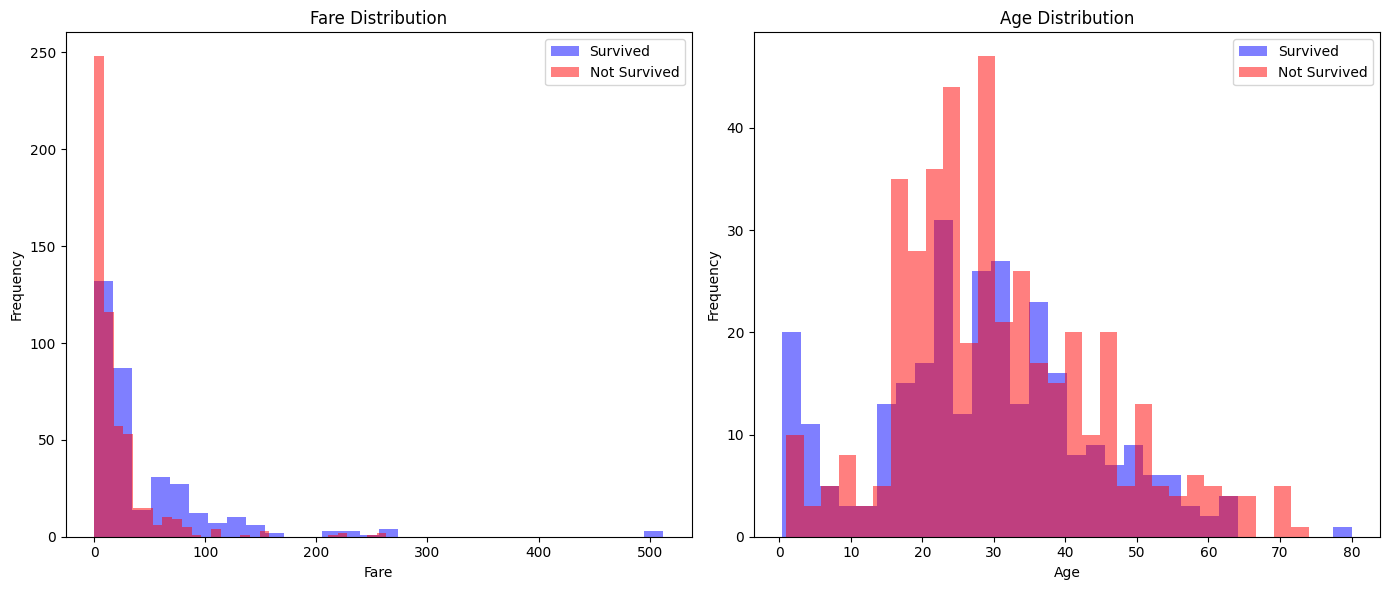

Да


In [23]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data[data['Survived'] == 1]['Fare'], bins = 30, alpha = 0.5, color = 'blue', label = 'Survived')

plt.hist(data[data['Survived'] == 0]['Fare'], bins = 30, alpha = 0.5, color = 'red', label = 'Not Survived')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(data[data['Survived'] == 1]['Age'].dropna(), bins=30, alpha=0.5, color='blue', label='Survived')
plt.hist(data[data['Survived'] == 0]['Age'].dropna(), bins=30, alpha=0.5, color='red', label='Not Survived')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

mean_age_survived = data[data['Survived'] == 1]['Age'].mean()
mean_age_not_survived = data[data['Survived'] == 0]['Age'].mean()
if mean_age_not_survived > mean_age_survived:
    print("Да")
else:
    print("Нет")

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**

In [29]:
mean_age_firstclass_male = data[(data['Pclass'] == 1)&(data['Sex'] == 'male')]['Age'].mean()
mean_age_secondclass_male = data[(data['Pclass'] == 2)&(data['Sex'] == 'male')]['Age'].mean()
mean_age_thirdclass_male = data[(data['Pclass'] == 3)&(data['Sex'] == 'male')]['Age'].mean()
mean_age_firstclass_female= data[(data['Pclass'] == 1)&(data['Sex'] == 'female')]['Age'].mean()
mean_age_allclasses_male = data[data['Sex'] == 'male']['Age'].mean()
mean_age_allclasses_female = data[data['Sex'] == 'female']['Age'].mean()
print(mean_age_firstclass_male, mean_age_secondclass_male, mean_age_thirdclass_male,mean_age_firstclass_female, mean_age_allclasses_male,mean_age_allclasses_female)

41.28138613861386 30.74070707070707 26.507588932806325 34.61176470588235 30.72664459161148 27.915708812260537
